#### Yugandhara Premraj Patil
#### Id: AIS031

### Task 9: Part 1

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#### Get the Data

In [4]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Untitled Folder 1\Ecommerce Customers")

#### Check the head of customers

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### Check out the description

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### Check out the information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#### Exploratory Data Analysis

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
plt.style.use('ggplot')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


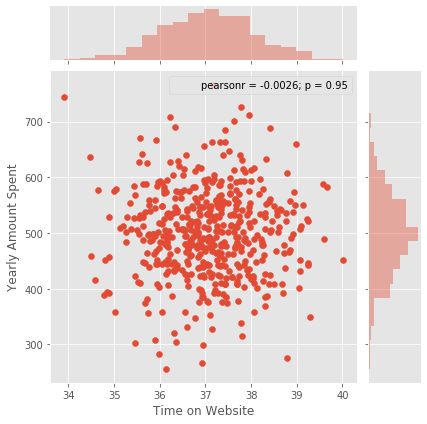

In [107]:
sns.jointplot(df['Time on Website'],df['Yearly Amount Spent']).annotate(sps.pearsonr)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


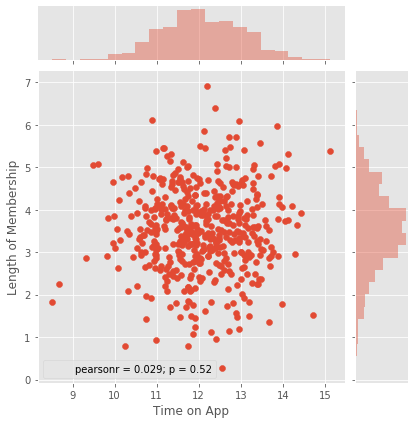

In [110]:
sns.jointplot(df['Time on App'],df['Length of Membership']).annotate(sps.pearsonr)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


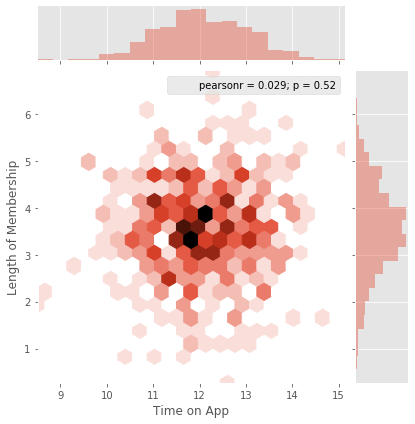

In [111]:
sns.jointplot(df['Time on App'],df['Length of Membership'],kind='hex').annotate(sps.pearsonr)

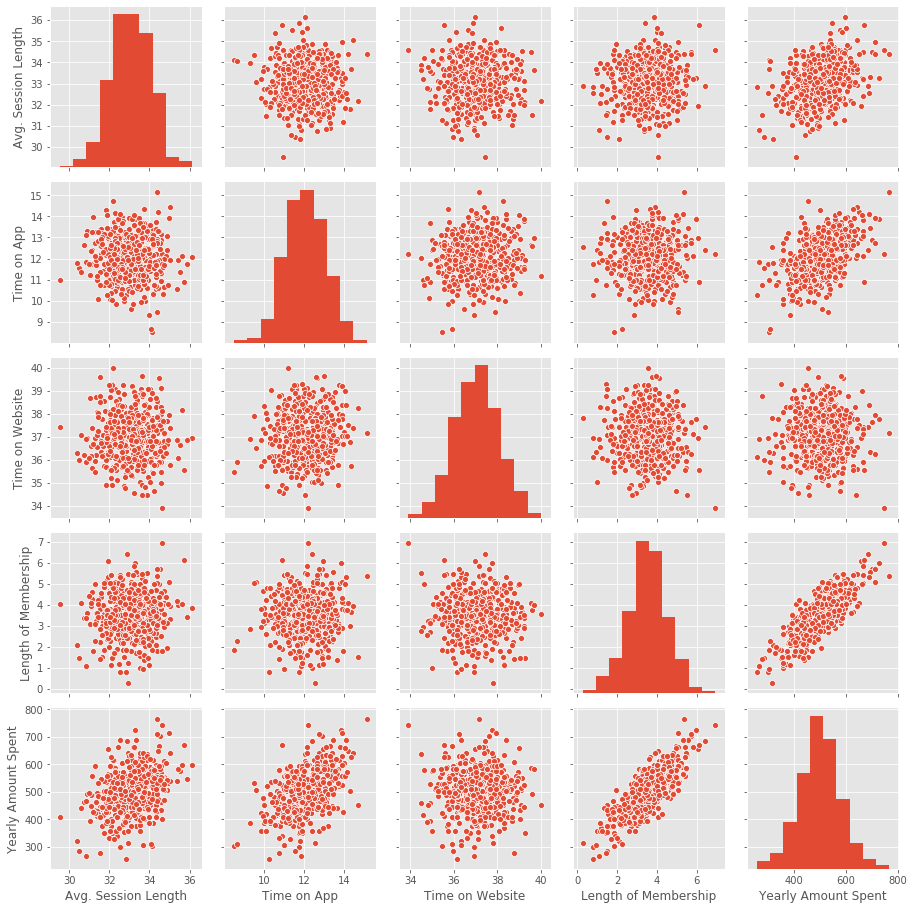

In [27]:
sns.pairplot(df)

>**Based on this plot length of membership looks to be the most  correlated feature with yearly Amount Spent**

#### Linear Model Plot of Yearly Amount spent  vs. Length of Membership

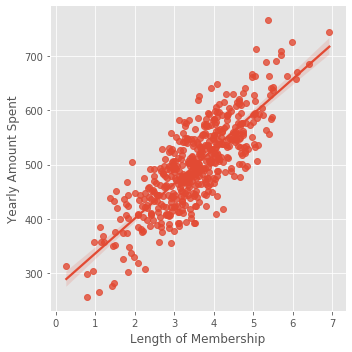

In [31]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

#### Training And Testing Data

In [64]:
x=df.iloc[:,3:7]

In [65]:
y=df.iloc[:,7:8]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

#### Training The Model 

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lm=LinearRegression()

In [70]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
Coefficients=lm.coef_
print('Coefficients: \n',Coefficients)

Coefficients: 
 [[25.98154972 38.59015875  0.19040528 61.27909654]]


#### Predicting Test Data

In [72]:
y_predict=lm.predict(x_test)

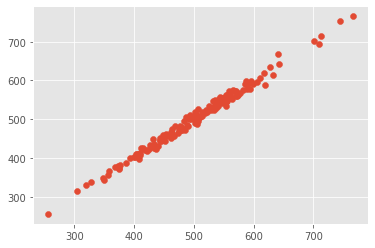

In [73]:
plt.scatter(y_test,y_predict)

#### Evaluating the Model 

In [74]:
from sklearn import metrics
import math
print('MAE:',metrics.mean_absolute_error(y_test,y_predict))
print('MSE:',metrics.mean_squared_error(y_test,y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


#### Residuals

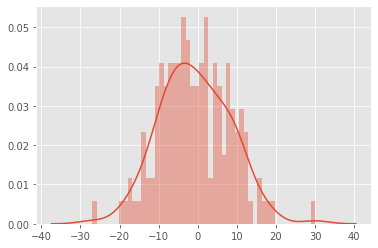

In [96]:
residual=y_test-y_predict
sns.distplot(residual,bins=50)

In [92]:
pd.DataFrame((lm.coef_).T,x.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


##### If we Increase the one unit of avg. session Length then our Yearly amount spent increase by an average 25.981550
##### If we Increase the one unit of Time on App then our Yearly amount spent increase by an average 38.590159
##### If we Increase the one unit of Time on Website then our Yearly amount spent increase by an average 0.190405
##### If we Increase the one unit of Length of Membership then our Yearly amount spent increase by an average 61.279097

#### Do you think the company should focus more on their mobile app or on their website?
#### ANS:
> I think Company Should have to focus on their website more than the mobile app 